In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
from lazypredict.Supervised import LazyClassifier
from sklearn.svm import SVC

In [16]:
data = pd.read_csv("E:\\INTERNs\\coding samurai intrn\\task2\\WA_Fn-UseC_-HR-Employee-Attrition.csv")
dataset=data.values
data.head() 

<IPython.core.display.Javascript object>

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [17]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [24]:
columns = [column for column in data.columns if data[column].dtype == 'object' and column != "Attrition"]
columns

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [25]:
for column in columns:
    print(f"In {column}: {data[column].value_counts()} \n\n")

In BusinessTravel: Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 


In Department: Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 


In EducationField: Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 


In Gender: Male      882
Female    588
Name: Gender, dtype: int64 


In JobRole: Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64 


In MaritalStatus: Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64 


In Over18: Y 

In [26]:
new_data = pd.get_dummies(data, columns=columns)
new_data["Attrition"] = new_data["Attrition"].map({"Yes":1, "No":0})
new_data.head()

<IPython.core.display.Javascript object>

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0


In [27]:
new_data["Attrition"].value_counts()


0    1233
1     237
Name: Attrition, dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>],
       [<Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>],
       [<Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title

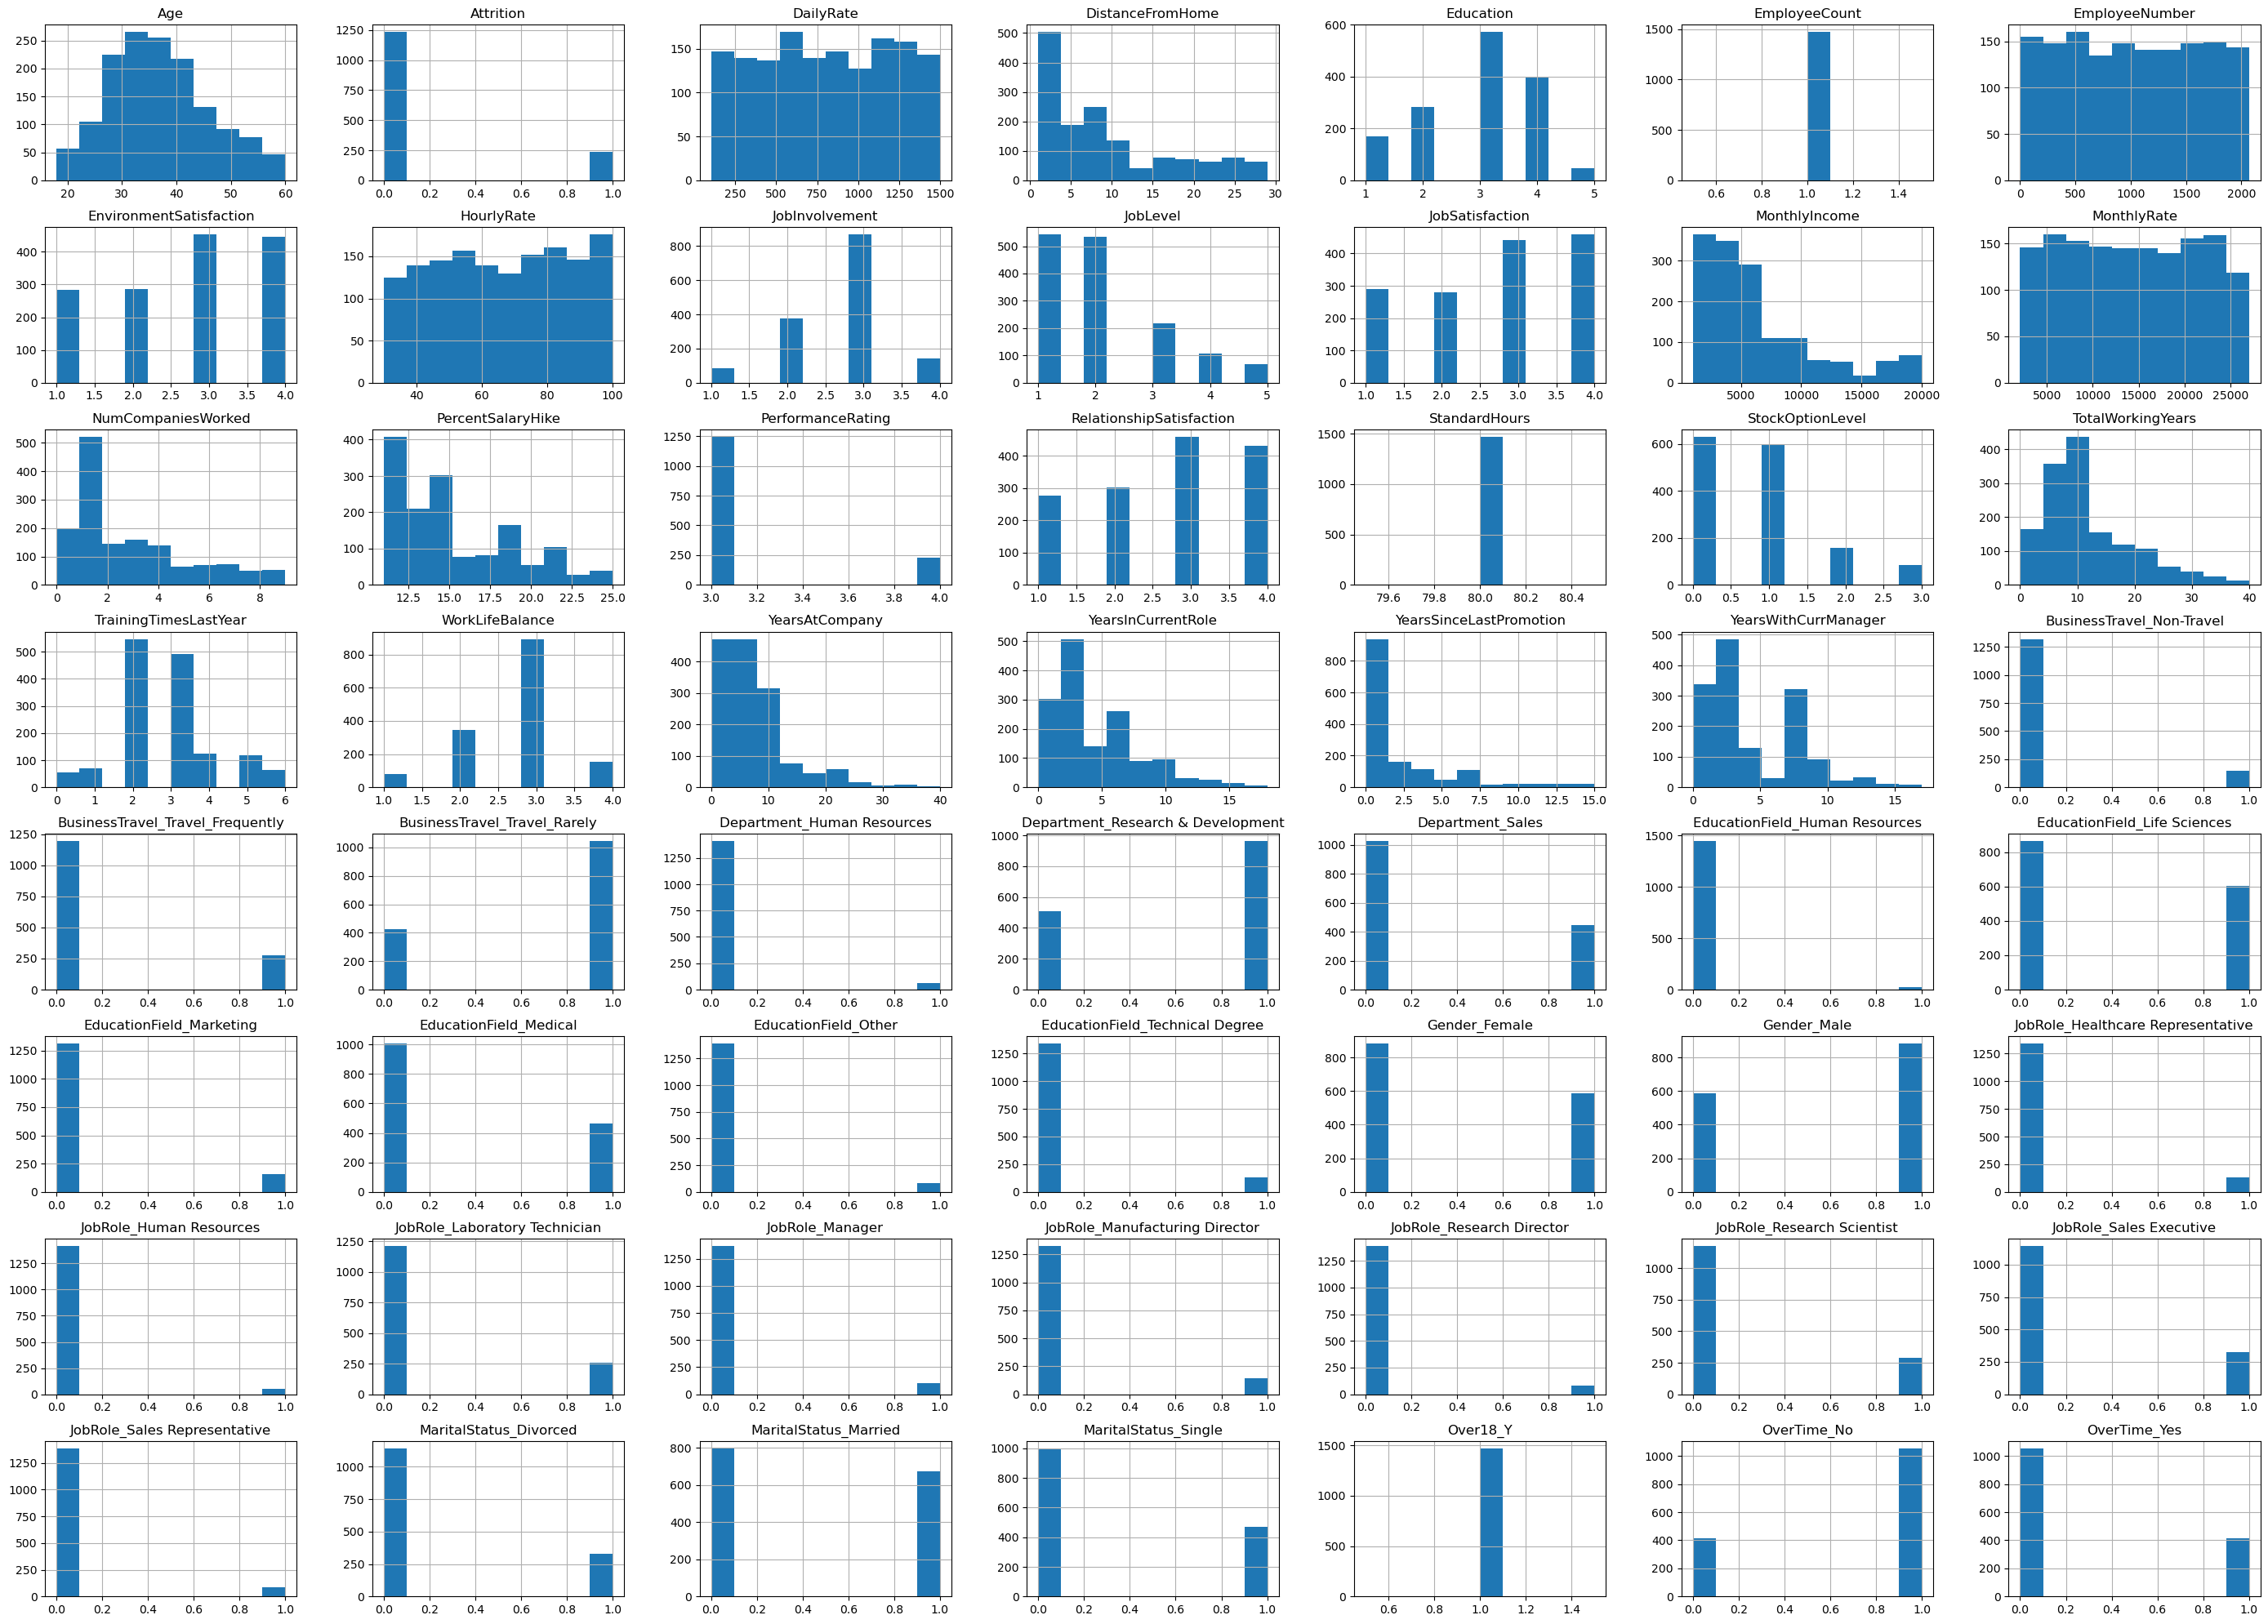

In [28]:
new_data.hist(figsize=(35, 25))


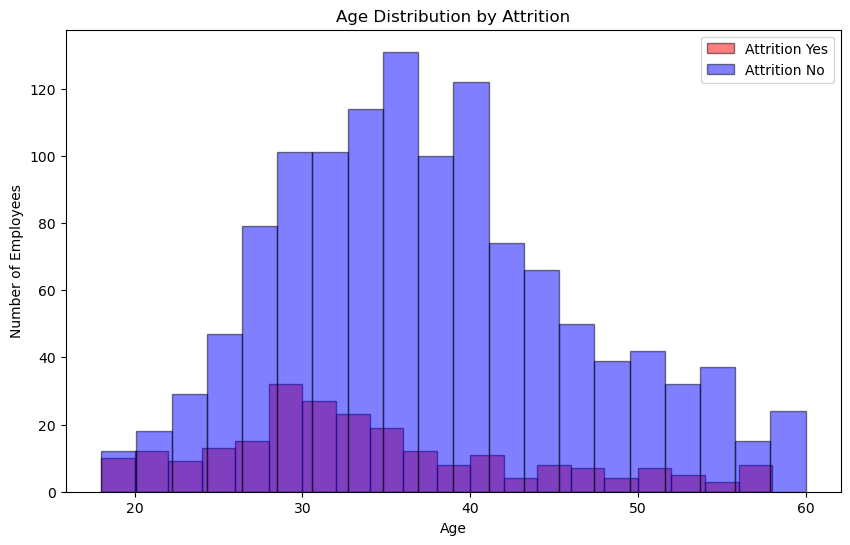

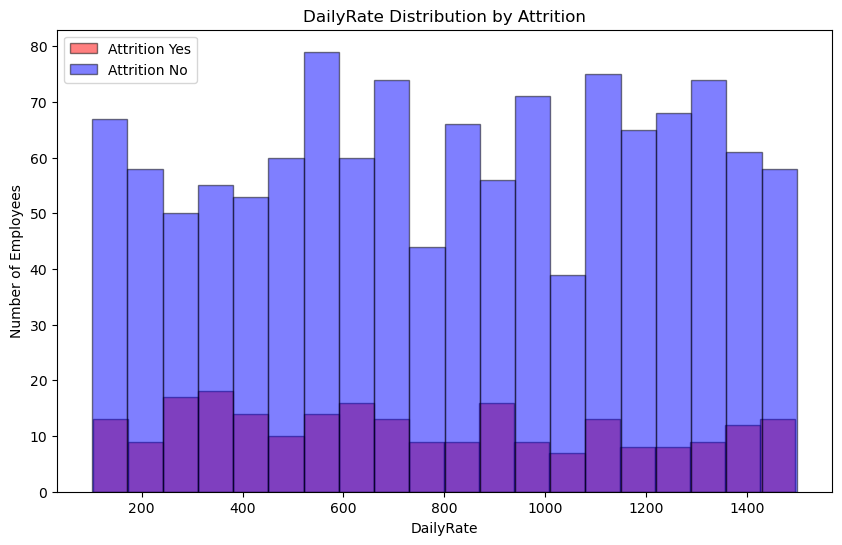

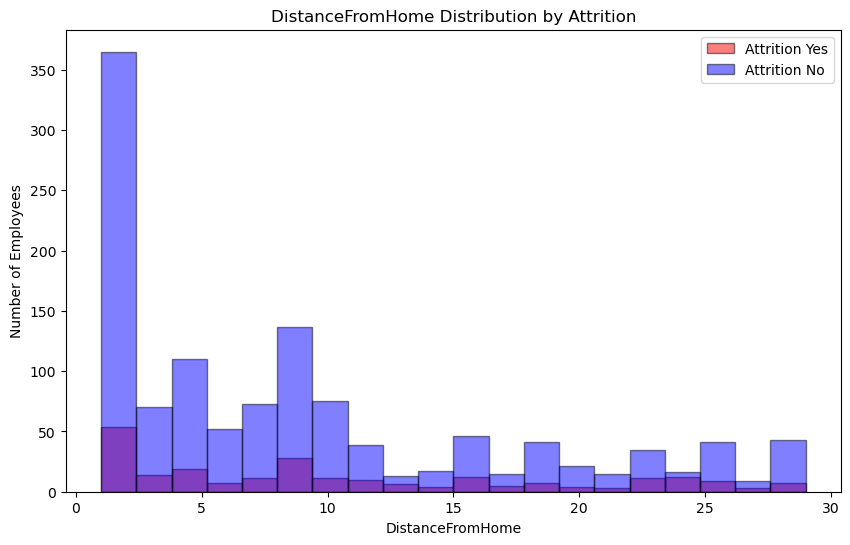

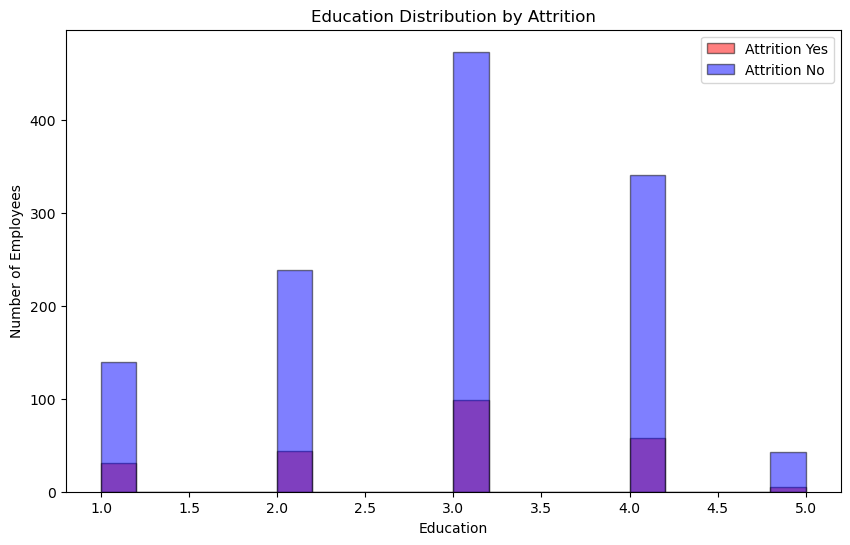

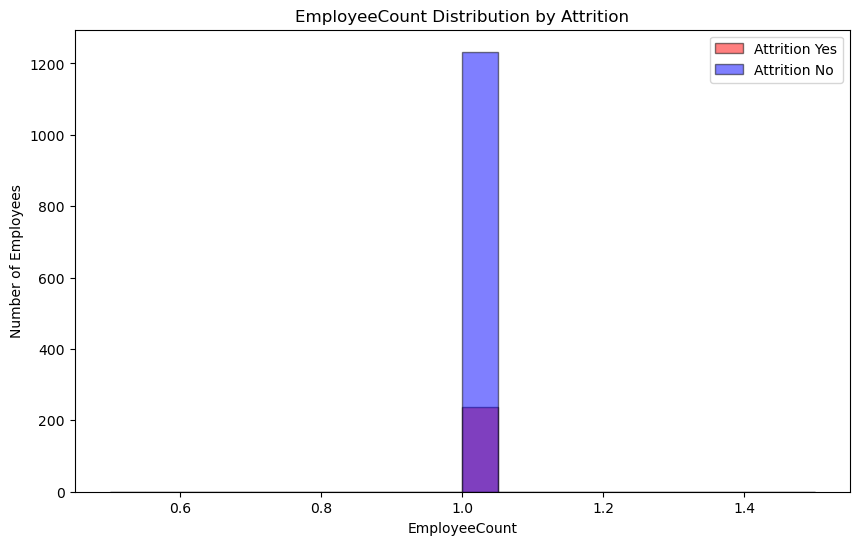

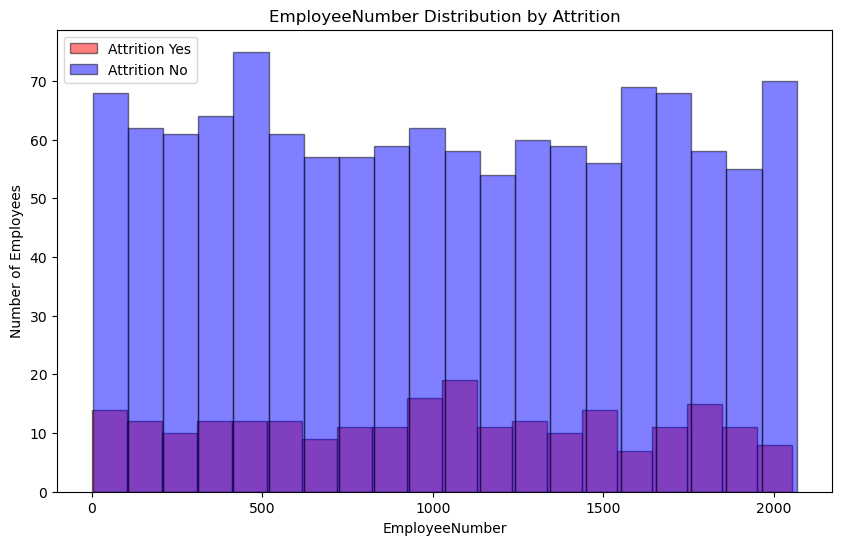

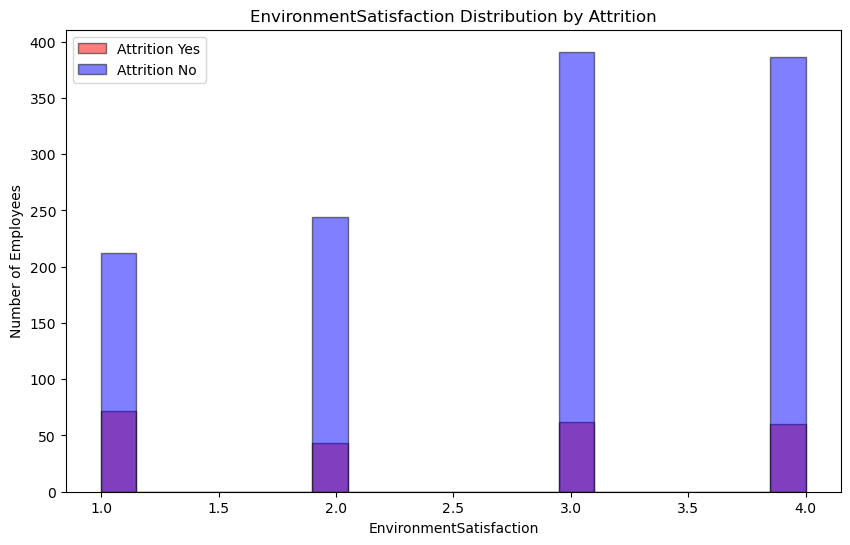

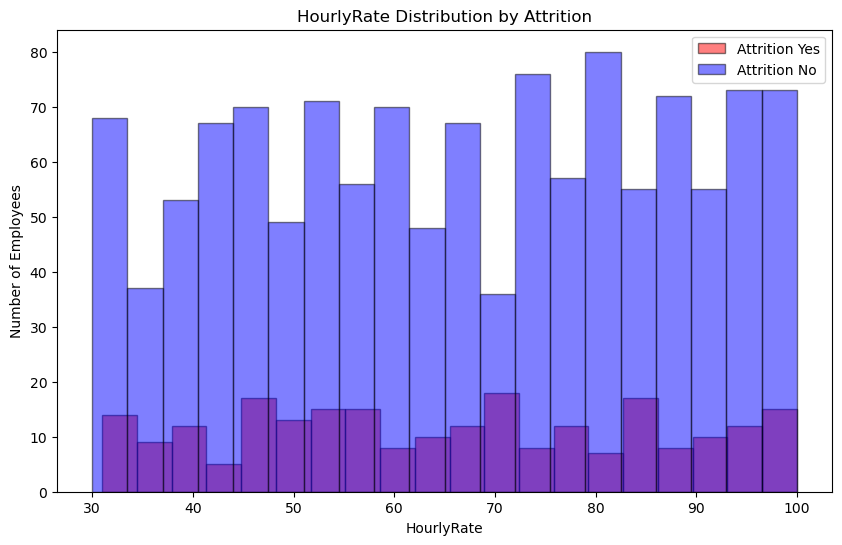

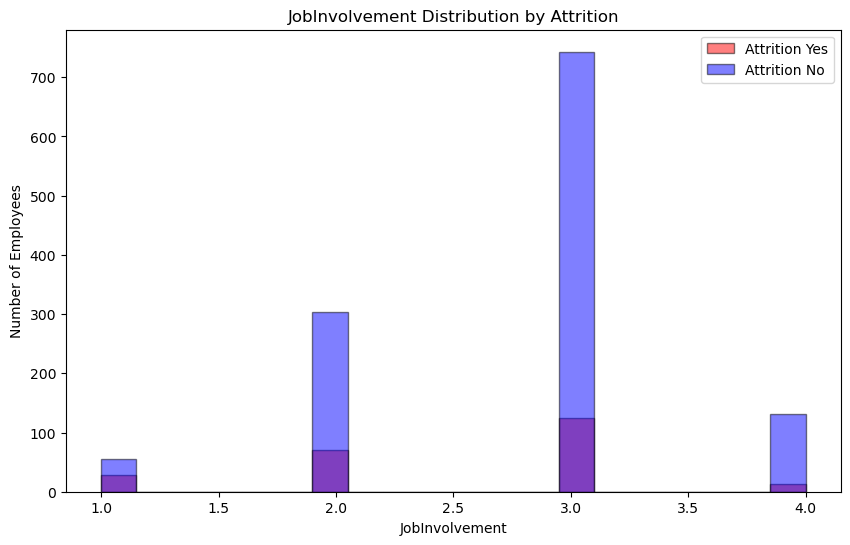

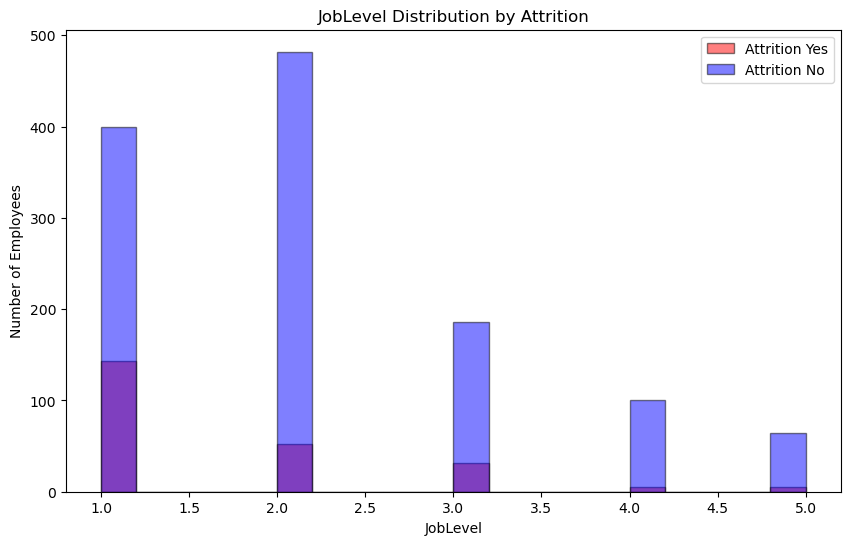

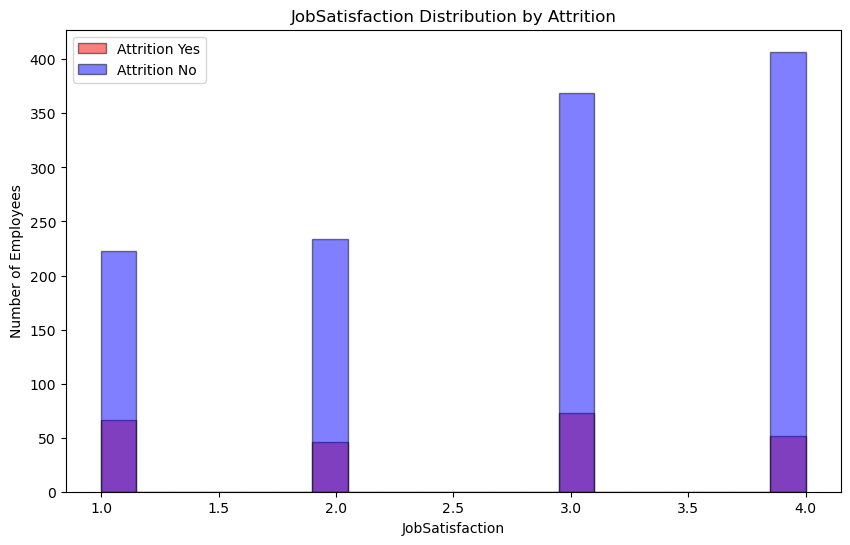

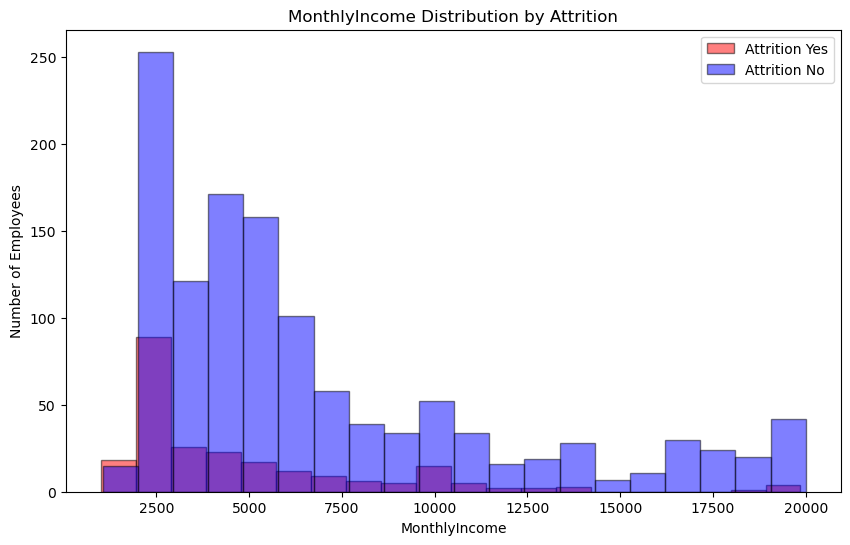

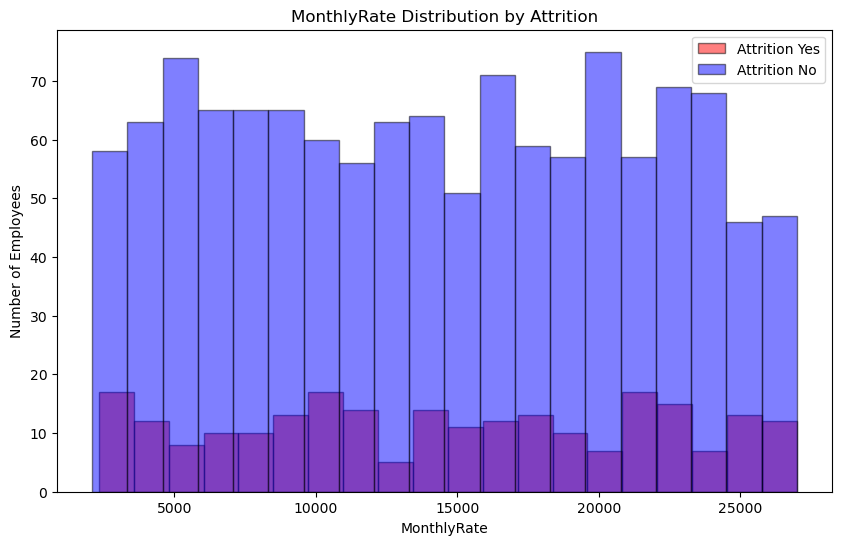

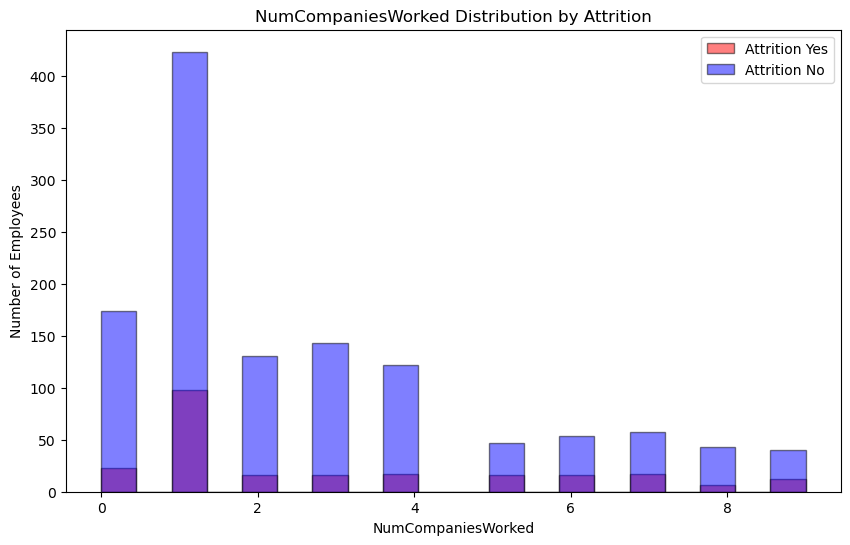

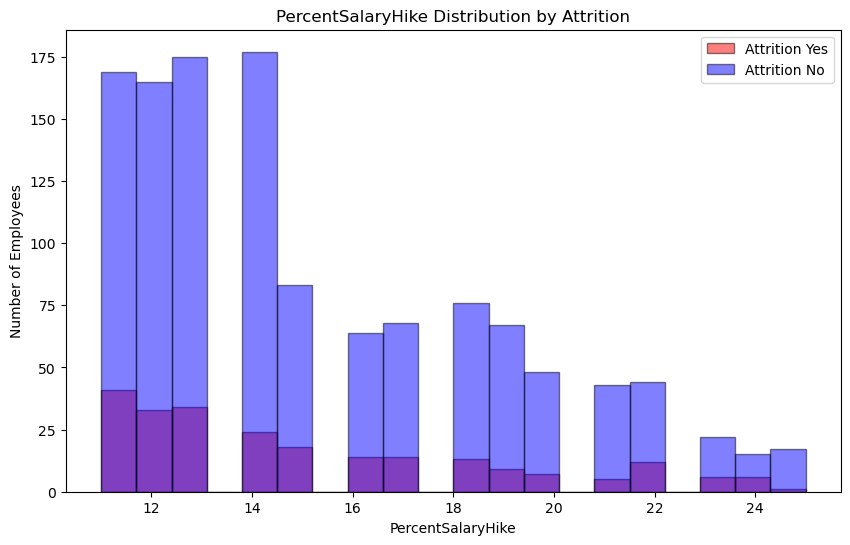

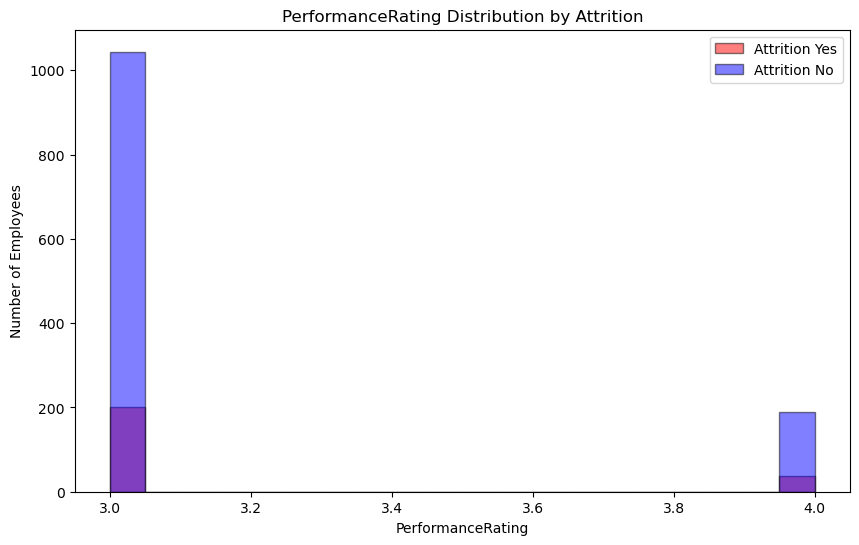

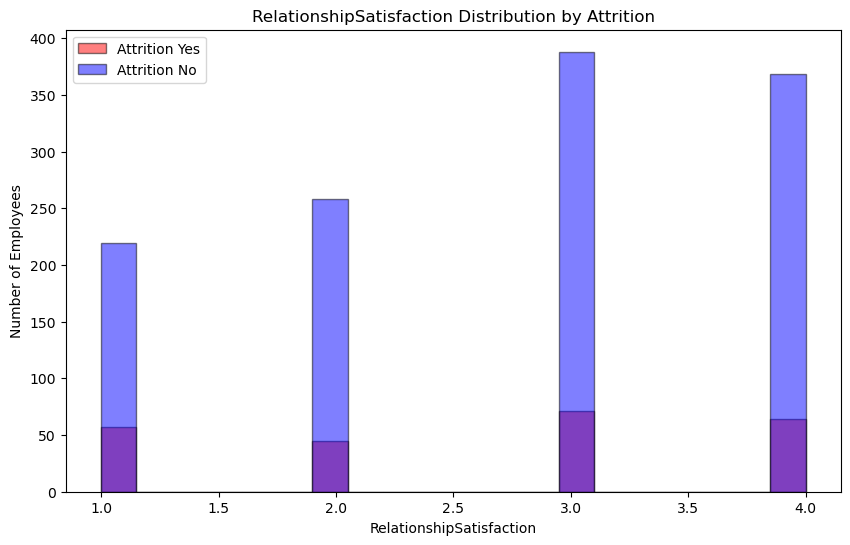

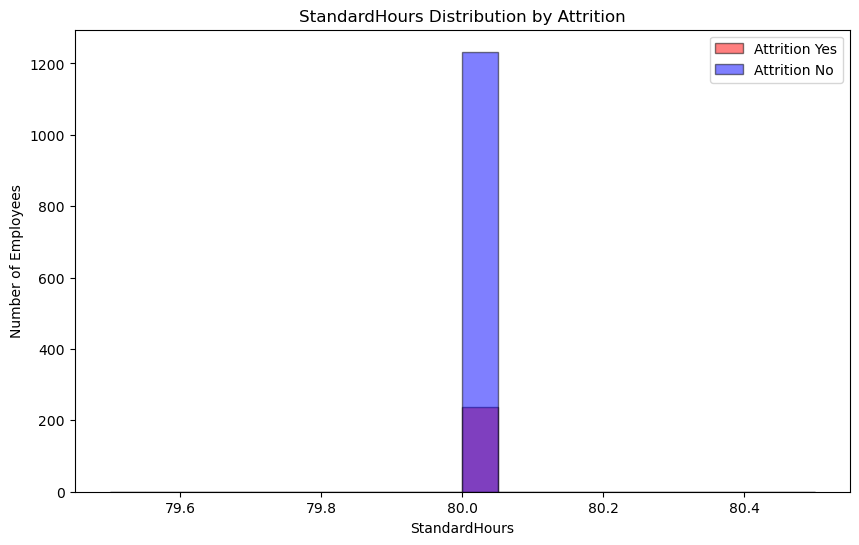

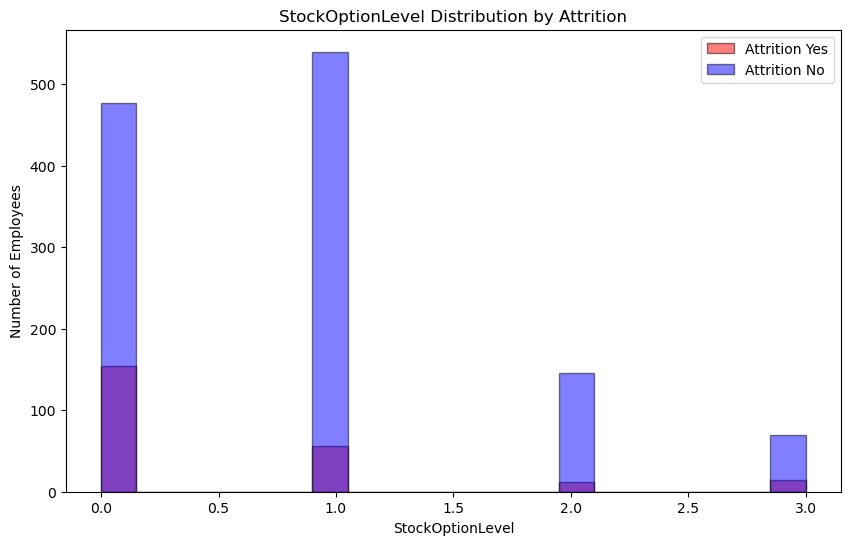

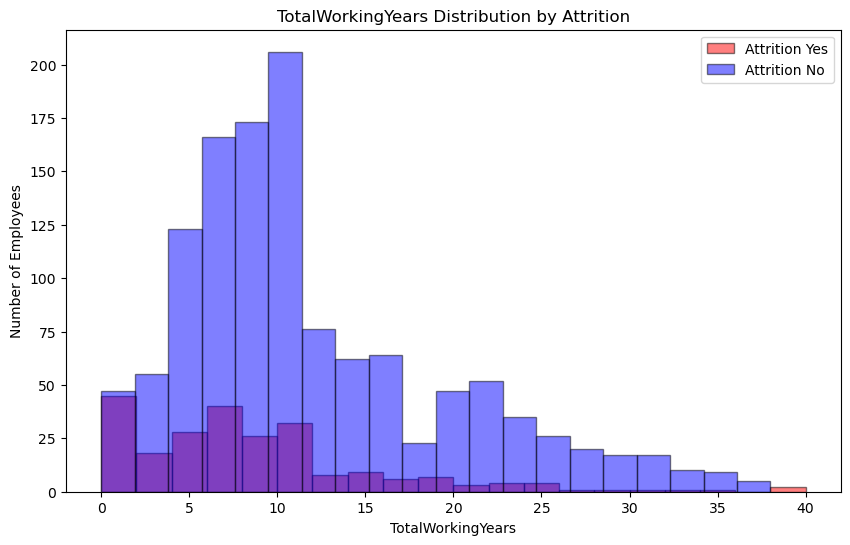

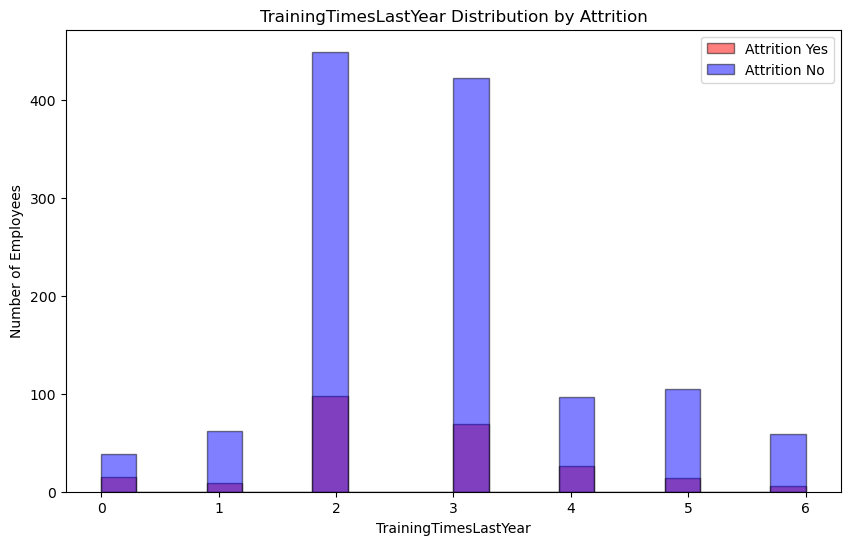

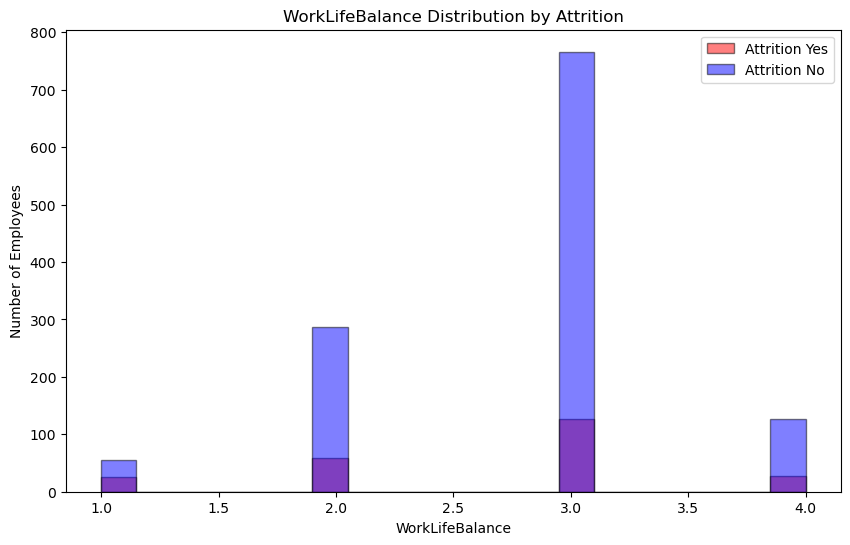

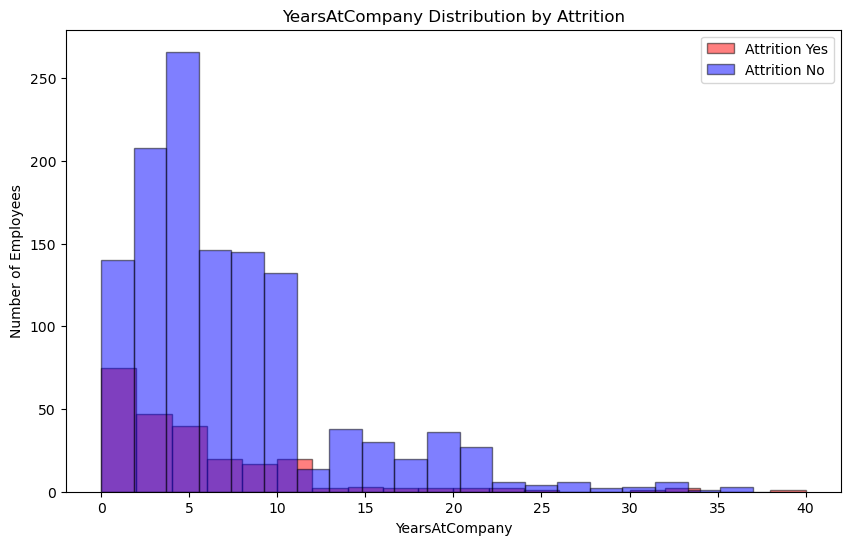

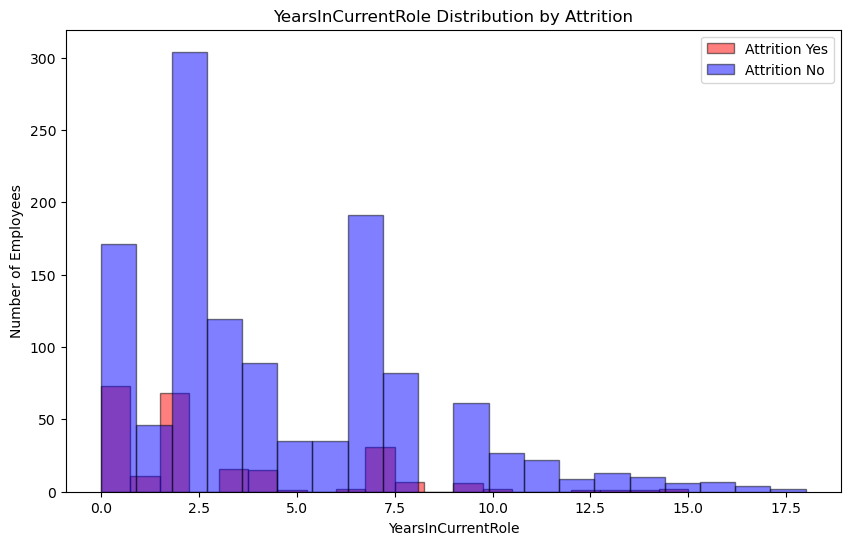

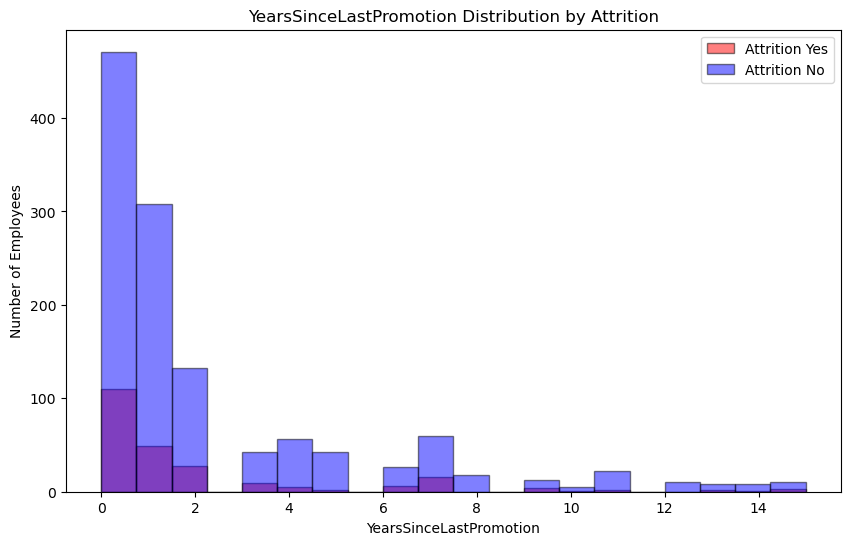

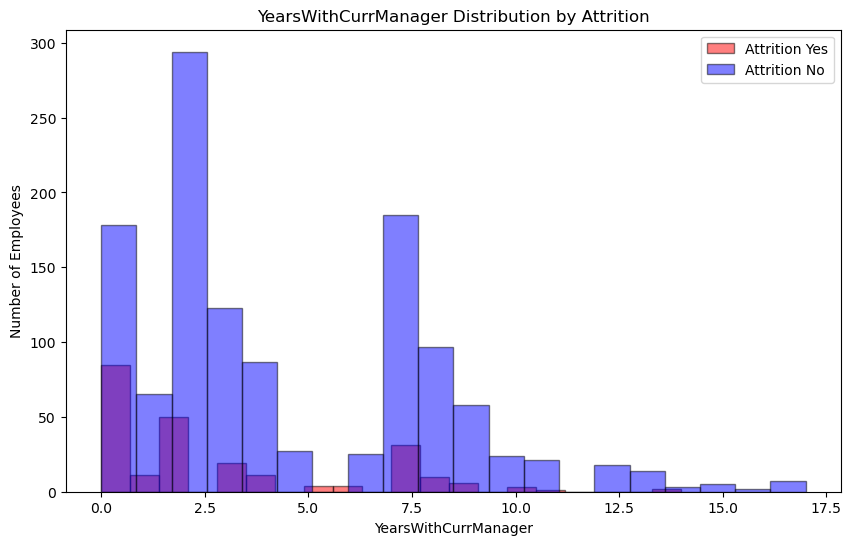

In [30]:
attrition_yes = data[data['Attrition'] == 'Yes']
attrition_no = data[data['Attrition'] == 'No']

# Loop through columns and create histograms
for column in data.columns:
    if data[column].dtype != 'object':
        plt.figure(figsize=(10, 6))
        plt.hist(attrition_yes[column], bins=20, alpha=0.5, label='Attrition Yes', color='red', edgecolor='black')
        plt.hist(attrition_no[column], bins=20, alpha=0.5, label='Attrition No', color='blue', edgecolor='black')
        plt.xlabel(column)
        plt.ylabel('Number of Employees')
        plt.title(f'{column} Distribution by Attrition')
        plt.legend()
        plt.show()

<Axes: >

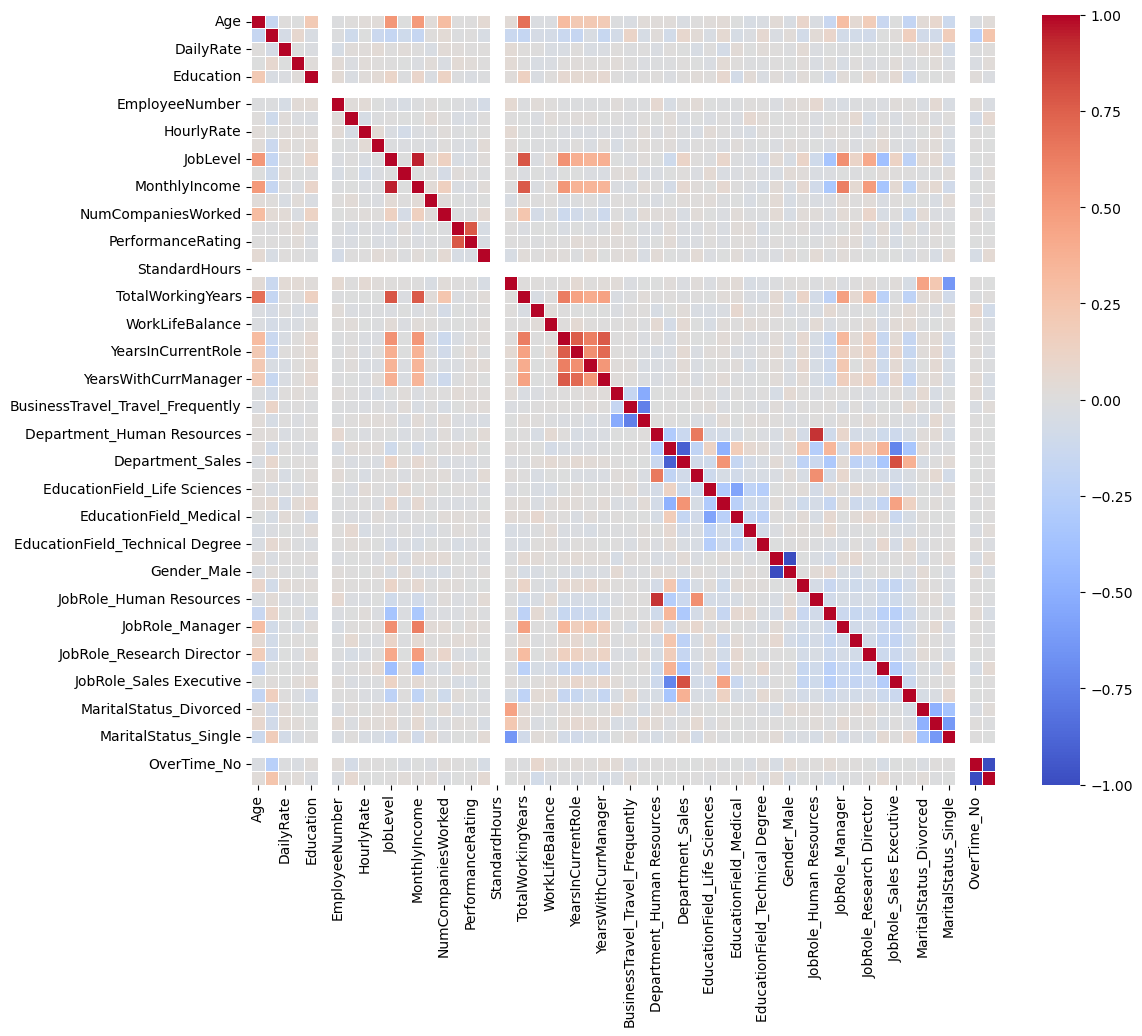

In [31]:
plt.figure(figsize=(12, 10))
sns.heatmap(encoded_data.corr(), cmap='coolwarm', linewidths=0.5)